# Background Section

### Using Oceanic Wave Data and Moon Phases to Predict Ocean Patterns and Animal Activity

   Weather patterns are some of the most unpredictable phenomena on the planet. Despite all the innovations of the past 200 years, it still seems as though predicting the weather on a day to day basis is simply a guessing game. Even the best and brightest meteorologists frequently make mistakes with their predictions. However, that does not stop them from continually trying to improve. Whether it be new technology and refining existing tools, humanity is always attempting to move further towards perfection.
    
   This attempt to better predict weather patterns corresponds with attempting to better understand oceanic patterns as well. After all, with the amount of international trade that takes place via ships, in addition to the millions of tourists that take beach vacations every year and do not wish to be disturbed by shallow swimming sharks, understanding oceanic patterns and how they affect sea life is an important endeavor. 
    
   With that being said, this project seeks to answer multiple questions about ocean patterns using wave data collected by buoys off of the coast of Queensland, Australia. The first problem that this dataset will be used for is finding relationships between the wave dataset variables. More specifically, can one variable or a combination of a few variables be used to accurately predict another one? The dataset has seven unique variables: date, time, average wave height, maximum wave height, average wave energy, wave frequency, wave peak direction, and sea surface temperature. The most important of these variables will be average and maximum wave height. Since greater wave height is generally associated with dangerous ocean conditions, being able to predict when waves were going to be at their largest would have positive real-world applications. Therefore, can sea surface temperature, date, time, wave peak direction, and wave energy by used to accurately and reliably predict average and maximum wave heights?
    
   Another problem that this project seeks to address is finding the correspondence, if one exists, between moon phases and oceanic patterns. It is generally known that the moon has an effect on wave patterns due to its gravitational pull on earth. However, the extent of this effect is worth looking into. Thus, this project seeks to examine whether moon phases can accurately and reliably predict any of the wave specific variable (average height, max height, peak direction, average energy, and frequency) in the wave dataset? 
    
   Finally, this project will look at the problem of predicting animal (specifically sharks) activity along coastlines. Using data gathered via protective netting around portions of the Queensland coastline, it is possible to determine when sharks got a little too close for comfort to the shoreline. Combined with the wave data date it is possible to determine the general conditions of the ocean when these sharks got too close. Based on this data, this project will ask can oceanic data be used to predict the conditions that sharks will be most likely to end up near the shoreline?
    
   These problems are interesting for a multitude of reasons. The most prevalent of which are the safety concerns that this data can help combat. Over one hundred people suffer from shark attacks every year. More than three thousand people drown in the ocean per year. Nearly three dozen ships disappear or are destroyed in that same time frame. These may not be the most frightening number, but they clearly show that it is feasible to improve safety when it comes to the ocean. If this project is able to track and predict ocean patterns and shark activity, it will give more data to those people with the resources to improve ocean safety. These people, most likely government officials, are the ones who would be interested in this problem. If they were able to predict when the ocean would be at its most dangerous beforehand, they could forbid ships and beachgoers alike from entering the water until it is safer. 
    
   There are a lot of studies out there that examine some of these questions. One study looked at the relationship between sea surface temperature and wave height. After a comprehensive study of this relationship, the researchers came to the conclusion that warmer sea surface temperatures were positively correlated with greater wave heights (Markina, Studholme, and Gulev). Another study looked at the role oceanic temperature played on shark habitation trends. The conclusion that this study found was that sharks generally were most active when the water temperature was about 28 degrees Celsius (Andrzejaczek). A third study examined the relationship between the phase of the moon and the height of waves. The study came to the conclusion that waves were at their greatest height during full and new moons as compared to quarter moons (Murmson). As these studies show, there is plenty of research and data on most of these topics. However, that does not mean that researchers have even scratched the tip of the iceberg on what can be learned about oceanic patterns. It will be very interesting to see if these studies are supported by the findings of this project. This project will, hopefully, also add some new findings to the existing knowledge base that academia has compiled on this topic. 
    
##### Citations
M. Y. Markina, J. H. P. Studholme and S. K. Gulev, Ocean Wind Wave Climate Responses to Wintertime North Atlantic Atmospheric Transient Eddies and Low-Frequency Flow, Journal of Climate, 10.1175/JCLI-D-18-0595.1, 32, 17, (5619-5638), (2019).

Andrzejaczek, Samantha et al. “Temperature and the vertical movements of oceanic whitetip sharks, Carcharhinus longimanus.” Scientific reports vol. 8,1 8351. 29 May. 2018, doi:10.1038/s41598-018-26485-3

Murmson, Serm. "The Effects of the Moon Phases on Ocean Tides" sciencing.com, https://sciencing.com/effects-moon-phases-ocean-tides-8435550.html. 22 October 2019.


# Data Sources

   The data that will be used for analysis during this project comes from three seperate data sources. The first two data scources come from the Queensland, Australia government website. The first source (https://www.data.qld.gov.au/dataset/coastal-data-system-waves-townsville) contains all the data relating to the actual waves such as height, freqeuncy, and sea surface temperature. The second data source (https://www.data.qld.gov.au/dataset/shark-control-program-shark-catch-statistics) contains all the data relating towards sharks that were caught near the shoreline. The third data source is one that I made myself to incorperate the phase of the moon into my analysis. It only includes the date and the moon phase as its variables.

# Methodology

## Data Processing

In [1]:
!sudo -H pip3 install --upgrade pip
!sudo pip install sklearn

DEPRECATION: Python 3.4 support has been deprecated. pip 19.1 will be the last one supporting it. Please upgrade your Python as Python 3.4 won't be maintained after March 2019 (cf PEP 429).
Requirement already up-to-date: pip in /usr/local/lib/python3.4/dist-packages (19.1.1)
DEPRECATION: Python 3.4 support has been deprecated. pip 19.1 will be the last one supporting it. Please upgrade your Python as Python 3.4 won't be maintained after March 2019 (cf PEP 429).


In [2]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
from scipy.stats import pearsonr
import seaborn as sns
%matplotlib inline

#### Importing the three data tables that I will be using

In [3]:
csv_path = 'wave_data.csv'
df = pd.read_csv(csv_path)
csv_path1 = 'shark_data.csv'
shark = pd.read_csv(csv_path1)
csv_path2 = 'MoonPhases.csv'
moon = pd.read_csv(csv_path2)

In [4]:
shark.head()

,Species Name,Species Code,Date,Area,Location,Latitude,Longitude,Fate,Length (m),Water Temp (C),Number Caught
0,BULL WHALER,37018021.0,8/4/17,Bribie Island,Woorim (Bribie Island),-27.06835189,153.2113376,Dead,1.55,21.0,1
1,TIGER SHARK,37018022.0,8/8/17,Bribie Island,Woorim (Bribie Island),27.06511,153.2108,Euthanised,3.55,19.0,1
2,BULL WHALER,37018021.0,3/3/17,Bundaberg,Neilson Park,-24.80429012,152.4641092,Dead,1.56,26.0,1
3,BULL WHALER,37018021.0,3/3/17,Bundaberg,Kellys Beach,-24.83788865,152.4673179,Dead,1.79,26.0,1
4,BULL WHALER,37018021.0,17/03/2017,Bundaberg,Neilson Park,-24.80864323,152.4327342,Dead,1.56,26.0,1


#### Shark dataset has a lot of information that I will not be using. First I will make it more usable for my research purposes

In [5]:
shark1 = shark[shark.Area == 'Townsville']
shark2 = shark1[['Date', 'Number Caught']]
sharkData = shark2.groupby('Date').count()
sharkData['Date'] = sharkData.index
sharkData.head()

,Number Caught,Date
Date,,
1/11/17,1,1/11/17
1/14/17,2,1/14/17
1/17/17,1,1/17/17
1/19/17,2,1/19/17
1/21/17,2,1/21/17


#### Next I need to break up the df Date/Time column into seperate Date and Time columns to properly merge with the other dataframes

In [6]:
df.head()

,Date/Time,Hs,Hmax,Tz,Tp,Peak Direction,SST
0,1/1/17 1:00,0.488,0.88,3.356,3.647,42.48,29.25
1,1/1/17 1:30,0.517,0.94,3.323,3.441,29.48,29.20
2,1/1/17 2:00,0.495,0.97,3.526,3.885,35.48,29.20
3,1/1/17 2:30,0.463,0.94,3.408,3.796,33.48,29.20
4,1/1/17 3:00,0.485,0.91,3.521,3.748,39.48,29.20


In [7]:
new = df["Date/Time"].str.split(" ", n = 1, expand = True)
df["Date"]= new[0] 
df["Time"]= new[1] 
df.head()

,Date/Time,Hs,Hmax,Tz,Tp,Peak Direction,SST,Date,Time
0,1/1/17 1:00,0.488,0.88,3.356,3.647,42.48,29.25,1/1/17,1:00
1,1/1/17 1:30,0.517,0.94,3.323,3.441,29.48,29.20,1/1/17,1:30
2,1/1/17 2:00,0.495,0.97,3.526,3.885,35.48,29.20,1/1/17,2:00
3,1/1/17 2:30,0.463,0.94,3.408,3.796,33.48,29.20,1/1/17,2:30
4,1/1/17 3:00,0.485,0.91,3.521,3.748,39.48,29.20,1/1/17,3:00


#### Merging the three dataframes

In [8]:
bigData = pd.merge(df, sharkData, on='Date', how='outer')
moon = moon.dropna()
fd = pd.merge(bigData, moon, on='Date', how='outer')
fd = fd.drop('Date/Time', axis = 1)
fd['Number Caught'].fillna(0, inplace = True)
fd['Moon Phase'].fillna(0, inplace = True)
fd = fd.dropna()
fd.head()

,Hs,Hmax,Tz,Tp,Peak Direction,SST,Date,Time,Number Caught,Moon Phase
0,0.488,0.88,3.356,3.647,42.48,29.25,1/1/17,1:00,0.0,1.0
1,0.517,0.94,3.323,3.441,29.48,29.20,1/1/17,1:30,0.0,1.0
2,0.495,0.97,3.526,3.885,35.48,29.20,1/1/17,2:00,0.0,1.0
3,0.463,0.94,3.408,3.796,33.48,29.20,1/1/17,2:30,0.0,1.0
4,0.485,0.91,3.521,3.748,39.48,29.20,1/1/17,3:00,0.0,1.0


#### Removing -99.9 values that the original df dataframe used to represent empty data

In [9]:
fd = fd[fd.Hmax != -99.9]
fd = fd[fd.Hs != -99.9]
fd = fd[fd.Tz != -99.9]
fd = fd[fd.Tp != -99.9]
fd = fd[fd['Peak Direction'] != -99.9]
fd = fd[fd.SST != -99.9]

### Variables
#### Date: Date in MM/DD/YYYY form
#### Times: Beginning of the half hour interval of wave measurement
#### Hs: Average wave height over the half hour interval
#### Hmax: Maximum wave height per interval
#### Tz: Average frequency of waves in seconds
#### Tp: Wave frequency, in seconds, when waves were at there peak energy
#### Peak Direction: Direction of the wave peak related to true north
#### SST: Sea surface temperature in celsius
#### Number Caught: Number of sharks caught close to the shoreline
#### Moon Phase: Phase of the moon

## Data Analysis

### Basic Data Analysis

#### Finding the maximum, minimum, and average value for all numeric variables

In [10]:
print(fd['Hs'].max())
print(fd['Hs'].min())
print(fd['Hs'].mean())

1.965
0.109
0.6267770394133823


In [11]:
print(fd['Hmax'].max())
print(fd['Hmax'].min())
print(fd['Hmax'].mean())

3.9
0.17
1.1037837992667279


In [12]:
print(fd['Tz'].max())
print(fd['Tz'].min())
print(fd['Tz'].mean())

6.085
2.265
3.587335071035747


In [13]:
print(fd['Tp'].max())
print(fd['Tp'].min())
print(fd['Tp'].mean())

13.077
1.67
4.849952509165902


In [14]:
print(fd['Peak Direction'].max())
print(fd['Peak Direction'].min())
print(fd['Peak Direction'].mean())

358.48
0.46
87.33056255728691


In [15]:
print(fd['SST'].max())
print(fd['SST'].min())
print(fd['SST'].mean())

32.25
21.2
26.383925297891842


In [16]:
print(fd['Number Caught'].max())
print(fd['Number Caught'].min())
print(fd['Number Caught'].mean())

3.0
0.0
0.29502749770852427


#### How often are waves dangerous? (Waves over 2.5 meters are considered rough)

In [17]:
print(fd[(fd['Hmax'] > 2.49)].shape)
print(fd.shape)
308/17457*100

(308, 10)
(17456, 10)


1.7643352236925016

Waves are dangerous roughly 1.76% of the time

#### How often are sharks near the shoreline?

In [18]:
print(fd[(fd['Number Caught'] > 0)].shape)
3574/17456*100

(3573, 10)


20.474335472043997

Sharks are near the shoreline about 20% of the time

### Data Analysis via Graphing

#### Using scatter plots to look for relationships between variables. First plotting average wave height vs. max wave height

(0.9806692548471363, 0.0)


/usr/local/lib/python3.4/dist-packages/matplotlib-2.1.1+1236.g869c984f5-py3.4-linux-x86_64.egg/matplotlib/font_manager.py:1323: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


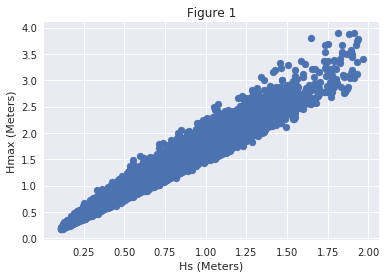

In [19]:
plt.scatter(fd['Hs'], fd['Hmax'])
plt.title("Figure 1")
plt.xlabel("Hs (Meters)")
plt.ylabel("Hmax (Meters)")
corr = pearsonr(fd['Hs'], fd['Hmax'])
print(corr)

Relationship between the variables is very strong with a correlation coefficient of 0.98

#### Plotting peak energy wave frequency vs. max wave height

(0.21952941295961095, 1.7161528397617126e-189)


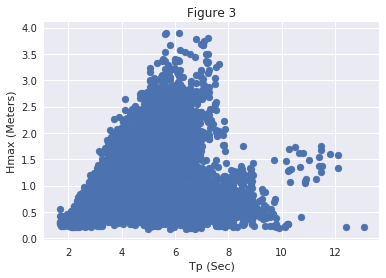

In [20]:
plt.scatter(fd['Tp'], fd['Hmax'])
plt.title("Figure 3")
plt.xlabel("Tp (Sec)")
plt.ylabel("Hmax (Meters)")
corr = pearsonr(fd['Tp'], fd['Hmax'])
print(corr)

Relationship between the variables exists, but is weak with correlation coefficient of 0.22

#### Plotting average wave frequency vs. max wave height

(0.5979546361959244, 0.0)


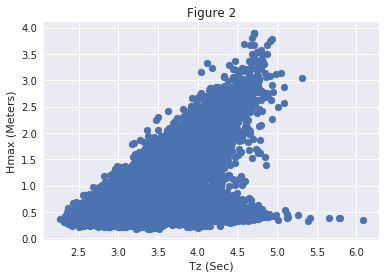

In [21]:
plt.scatter(fd['Tz'], fd['Hmax'])
plt.title("Figure 2")
plt.xlabel("Tz (Sec)")
plt.ylabel("Hmax (Meters)")
corr = pearsonr(fd['Tz'], fd['Hmax'])
print(corr)

Relationship between the two variables is pretty strong with a correlation coefficient of 0.59

#### Plotting sea surface temperature vs max wave height

(-0.049695980452769864, 5.0491508945996496e-11)


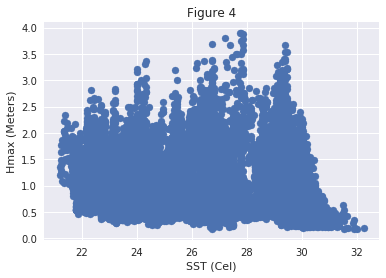

In [22]:
plt.scatter(fd['SST'], fd['Hmax'])
plt.title("Figure 4")
plt.xlabel("SST (Cel)")
plt.ylabel("Hmax (Meters)")
corr = pearsonr(fd['SST'], fd['Hmax'])
print(corr)

Relationship between the two variables is very weak with a correlation coefficient of practically zero

#### Plotting peak direction vs. max wave height

(0.19813974010703359, 4.868527548294022e-154)


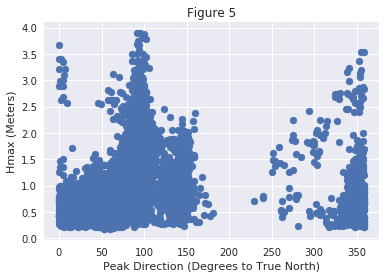

In [23]:
plt.scatter(fd['Peak Direction'], fd['Hmax'])
plt.title("Figure 5")
plt.xlabel("Peak Direction (Degrees to True North)")
plt.ylabel("Hmax (Meters)")
corr = pearsonr(fd['Peak Direction'], fd['Hmax'])
print(corr)

Relationship looks very weak, but is actually fairly decent with a correlation coefficient of 0.20

#### Graphing sharks near the shoreline by month

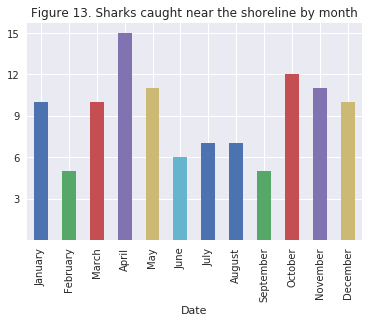

In [49]:
sharkData['Date'] = pd.to_datetime(sharkData['Date']) 
ShMon = sharkData.groupby(sharkData['Date'].dt.strftime('%B'))['Number Caught'].sum()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ShMon = ShMon.reindex(months)
p1 = ShMon.plot(kind='bar', title='Figure 13. Sharks caught near the shoreline by month', yticks=[3, 6, 9, 12, 15])

Sharks near the shoreline appear to be very randomized. Although there is a clear drop off of those caught between June and September. The sharks caught also seem to be consistently higher between October and January. Between February and May is where we see the biggest variation in sharks caught near the shore. 

#### Graphing periods of dangerous waves by month

In [25]:
danger = fd[(fd['Hmax'] > 2.49)]
danger['Date'] = pd.to_datetime(danger['Date']) 
danger['Count'] = 1
danger1 = danger[['Date', 'Count']]
danger2 = danger1.groupby('Date').count()
danger2['Date'] = danger2.index
DanMon = danger2.groupby(danger2['Date'].dt.strftime('%B'))['Count'].sum()
DanMon = DanMon.reindex(months)


/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


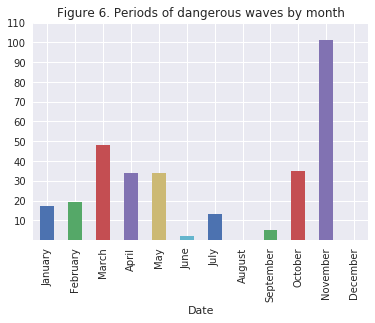

In [26]:
p1 = DanMon.plot(kind='bar', title='Figure 6. Periods of dangerous waves by month', yticks=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110])

The dangerous waves were definetly prevalent during the first few months of the year, as they were fairly consistent between January and May. Between June and September the waves were fairly calm. Then the dangerous periods increased during October before seeing a massive spike in November. 

#### To better understand this data I need to look at the individual month data. Before this can be done the Date column needs to be broken down further into month. 

In [27]:
fd['Date'] = pd.to_datetime(fd['Date'])      
fd['month'] = fd['Date'].dt.month
fd['day'] = fd['Date'].dt.day
fd.head()

,Hs,Hmax,Tz,Tp,Peak Direction,SST,Date,Time,Number Caught,Moon Phase,month,day
0,0.488,0.88,3.356,3.647,42.48,29.25,2017-01-01,1:00,0.0,1.0,1,1
1,0.517,0.94,3.323,3.441,29.48,29.20,2017-01-01,1:30,0.0,1.0,1,1
2,0.495,0.97,3.526,3.885,35.48,29.20,2017-01-01,2:00,0.0,1.0,1,1
3,0.463,0.94,3.408,3.796,33.48,29.20,2017-01-01,2:30,0.0,1.0,1,1
4,0.485,0.91,3.521,3.748,39.48,29.20,2017-01-01,3:00,0.0,1.0,1,1


#### Now lets look graph the November dangerous waves to see why it is such an outlier

In [28]:
November = fd[fd['month']==11]
November.head()

,Hs,Hmax,Tz,Tp,Peak Direction,SST,Date,Time,Number Caught,Moon Phase,month,day
14592,0.398,0.81,3.181,3.493,14.46,27.60,2017-11-01,1:00,0.0,2.0,11,1
14593,0.388,0.71,3.141,3.538,15.46,27.55,2017-11-01,1:30,0.0,2.0,11,1
14594,0.393,0.65,3.134,3.594,23.46,27.55,2017-11-01,2:00,0.0,2.0,11,1
14595,0.375,0.60,3.187,3.543,28.46,27.50,2017-11-01,2:30,0.0,2.0,11,1
14596,0.377,0.79,3.116,3.243,26.46,27.50,2017-11-01,3:00,0.0,2.0,11,1


In [29]:
November['Count'] = np.where(November['Hmax']>2.49, 1, 0)
danger = November[['day', 'Count']]
NovDan = danger.groupby('day').agg({'Count': ['sum']})

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


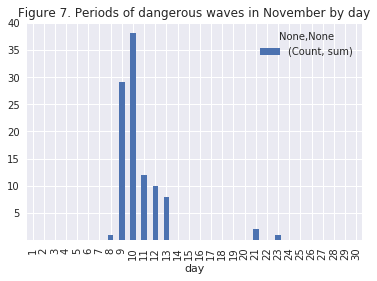

In [30]:
p1 = NovDan.plot(kind='bar', title='Figure 7. Periods of dangerous waves in November by day', yticks=[5, 10, 15, 20, 25, 30, 35, 40])

We can see by looking at the graph that there was a massive spike in dangerous wave activity between the 9th and 13th of November. This could possibly be contributed to a large storm or some other phenomena. 

#### Lets look at the data just from the days of the dangerous waves spike and compare it to the data from the entire year to see if any trends present themselves.

In [31]:
storm = November[November['day'].isin([9, 10, 11, 12, 13])]

#### Comparing storm data to overall data via scatterplots

Text(0,0.5,'Tz (Sec)')

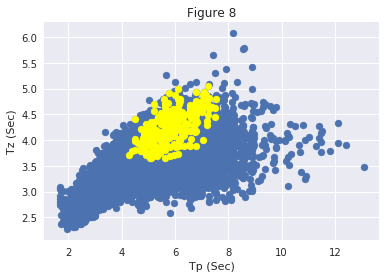

In [32]:
plt.scatter(fd['Tp'], fd['Tz'])
plt.scatter(storm['Tp'], storm['Tz'], color = "yellow")
plt.title("Figure 8")
plt.xlabel("Tp (Sec)")
plt.ylabel("Tz (Sec)")

When looking at average wave frequency and peak energy wave frequency of the storm data, it is obvious that the storm data is clustered in a very specific area of the overall data. During the storm days, the peak energy wave frequency was consistently between 4 and 8 seconds, while the average wave frequency was between 3.5 and 5 seconds

Text(0.5,0,'SST (Cel)')

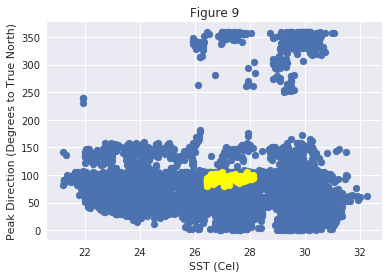

In [33]:
plt.scatter(fd['SST'], fd['Peak Direction'])
plt.scatter(storm['SST'], storm['Peak Direction'], color = "yellow")
plt.title("Figure 9")
plt.ylabel("Peak Direction (Degrees to True North)")
plt.xlabel("SST (Cel)")

When looking at the sea surface temperature and the peak direction of the storm data, the data is again clustered in a specific area of the overall data. During the storm days the sea surface temperature was between 26 and 28 degrees celsius (It should be noted that sea surface temperature does not change quickly, so this may mean nothing), while peak direction was always between 75 and 100 degrees related to true north. 

In [34]:
danger = fd[(fd['Hmax'] > 2.49)]
danger.head()

,Hs,Hmax,Tz,Tp,Peak Direction,SST,Date,Time,Number Caught,Moon Phase,month,day
370,1.565,3.03,4.575,5.699,98.48,29.20,2017-01-08,18:00,0.0,2.0,1,8
372,1.516,2.58,4.342,6.509,99.48,29.20,2017-01-08,19:00,0.0,2.0,1,8
374,1.459,2.88,4.423,5.490,98.48,29.25,2017-01-08,20:00,0.0,2.0,1,8
375,1.458,2.88,4.252,5.078,98.48,29.25,2017-01-08,20:30,0.0,2.0,1,8
386,1.291,2.72,4.025,6.940,97.48,29.10,2017-01-09,2:00,0.0,2.0,1,9


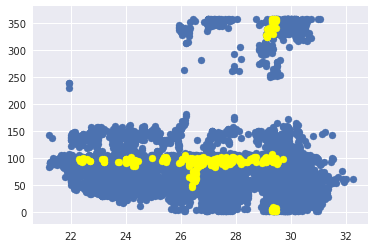

In [35]:
plt.scatter(fd['SST'], fd['Peak Direction'])
plt.scatter(danger['SST'], danger['Peak Direction'], color = "yellow")

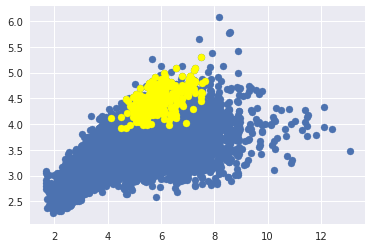

In [36]:
plt.scatter(fd['Tp'], fd['Tz'])
plt.scatter(danger['Tp'], danger['Tz'], color = "yellow")

/usr/local/lib/python3.4/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


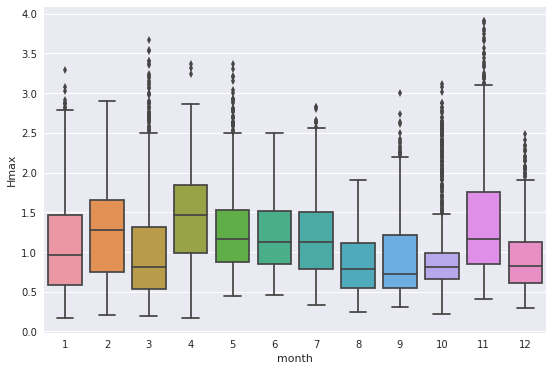

In [37]:
fig = plt.figure(1, figsize=(9, 6))
sns.boxplot(x='month',y='Hmax',data=fd)

/usr/local/lib/python3.4/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


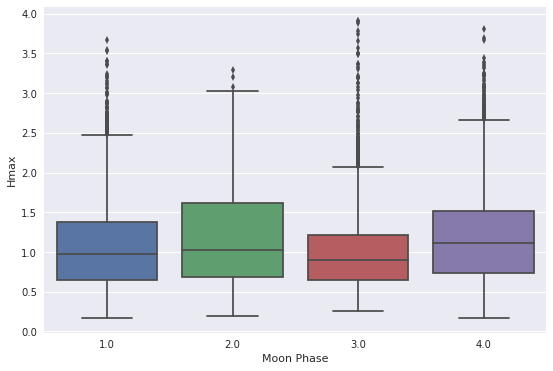

In [38]:
fig = plt.figure(1, figsize=(9, 6))
sns.boxplot(x='Moon Phase',y='Hmax',data=fd)

/usr/local/lib/python3.4/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


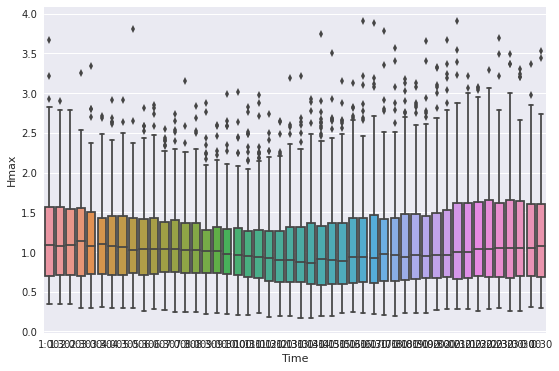

In [39]:
fig = plt.figure(1, figsize=(9, 6))
sns.boxplot(x='Time',y='Hmax',data=fd)

In [40]:
sharkDay = fd[(fd['Number Caught'] > 0)]
sharkDay.head()

,Hs,Hmax,Tz,Tp,Peak Direction,SST,Date,Time,Number Caught,Moon Phase,month,day
478,1.171,1.97,4.042,4.703,105.48,29.00,2017-01-11,0:00,1.0,2.0,1,11
479,1.200,2.12,3.951,4.835,95.48,29.00,2017-01-11,0:30,1.0,2.0,1,11
480,1.107,2.08,3.869,4.852,101.48,28.95,2017-01-11,1:00,1.0,2.0,1,11
481,1.126,2.12,3.935,5.199,97.48,28.95,2017-01-11,1:30,1.0,2.0,1,11
482,1.168,2.03,3.892,4.792,101.48,28.95,2017-01-11,2:00,1.0,2.0,1,11


Text(0.5,0,'Tp (Sec)')

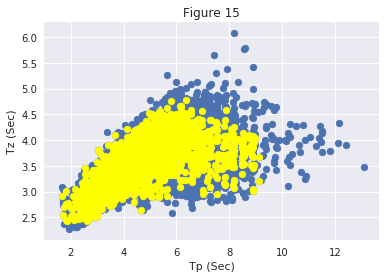

In [46]:
plt.scatter(fd['Tp'], fd['Tz'])
plt.scatter(sharkDay['Tp'], sharkDay['Tz'], color = "yellow")
plt.title("Figure 15")
plt.ylabel("Tz (Sec)")
plt.xlabel("Tp (Sec)")

Text(0.5,0,'Hmax (Meters)')

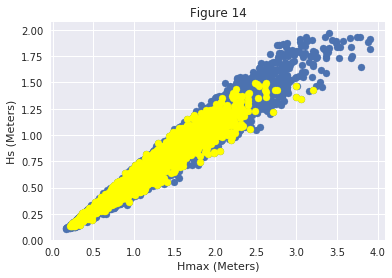

In [50]:
plt.scatter(fd['Hmax'], fd['Hs'])
plt.scatter(sharkDay['Hmax'], sharkDay['Hs'], color = "yellow")
plt.title("Figure 14")
plt.ylabel("Hs (Meters)")
plt.xlabel("Hmax (Meters)")

Text(0.5,0,'SST (Cel)')

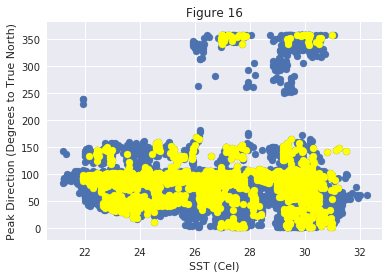

In [48]:
plt.scatter(fd['SST'], fd['Peak Direction'])
plt.scatter(sharkDay['SST'], sharkDay['Peak Direction'], color = "yellow")
plt.title("Figure 16")
plt.ylabel("Peak Direction (Degrees to True North)")
plt.xlabel("SST (Cel)")